#  Pandas Classification model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

# Data inlezen

In [2]:
dataset = pd.read_csv('Supplement_Sales_Dataset.csv')
dataset

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon


In [8]:
X = dataset.drop(['Category', 'Date'], axis=1)
y = dataset['Category']
X

,Product Name,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,Whey Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,Vitamin C,139,42.51,5908.89,0.04,0,UK,Amazon
2,Fish Oil,161,12.91,2078.51,0.25,0,Canada,Amazon
3,Multivitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,Pre-Workout,157,35.47,5568.79,0.25,3,Canada,iHerb
...,...,...,...,...,...,...,...,...
4379,Melatonin,160,47.79,7646.40,0.21,1,USA,iHerb
4380,Biotin,154,38.12,5870.48,0.22,1,UK,Walmart
4381,Green Tea Extract,139,20.40,2835.60,0.12,3,USA,iHerb
4382,Iron Supplement,154,18.31,2819.74,0.23,2,Canada,Amazon


In [9]:
# convert the string types data columns

X = pd.get_dummies(X, columns=['Product Name', 'Location', 'Platform'])
X

,Units Sold,Price,Revenue,Discount,Units Returned,Product Name_Ashwagandha,Product Name_BCAA,Product Name_Biotin,Product Name_Collagen Peptides,Product Name_Creatine,...,Product Name_Pre-Workout,Product Name_Vitamin C,Product Name_Whey Protein,Product Name_Zinc,Location_Canada,Location_UK,Location_USA,Platform_Amazon,Platform_Walmart,Platform_iHerb
0,143,31.98,4573.14,0.03,2,False,False,False,False,False,...,False,False,True,False,True,False,False,False,True,False
1,139,42.51,5908.89,0.04,0,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,161,12.91,2078.51,0.25,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,140,16.07,2249.80,0.08,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,157,35.47,5568.79,0.25,3,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,160,47.79,7646.40,0.21,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4380,154,38.12,5870.48,0.22,1,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4381,139,20.40,2835.60,0.12,3,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
4382,154,18.31,2819.74,0.23,2,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [11]:
list(X.columns)

['Units Sold',
 'Price',
 'Revenue',
 'Discount',
 'Units Returned',
 'Product Name_Ashwagandha',
 'Product Name_BCAA',
 'Product Name_Biotin',
 'Product Name_Collagen Peptides',
 'Product Name_Creatine',
 'Product Name_Electrolyte Powder',
 'Product Name_Fish Oil',
 'Product Name_Green Tea Extract',
 'Product Name_Iron Supplement',
 'Product Name_Magnesium',
 'Product Name_Melatonin',
 'Product Name_Multivitamin',
 'Product Name_Pre-Workout',
 'Product Name_Vitamin C',
 'Product Name_Whey Protein',
 'Product Name_Zinc',
 'Location_Canada',
 'Location_UK',
 'Location_USA',
 'Platform_Amazon',
 'Platform_Walmart',
 'Platform_iHerb']

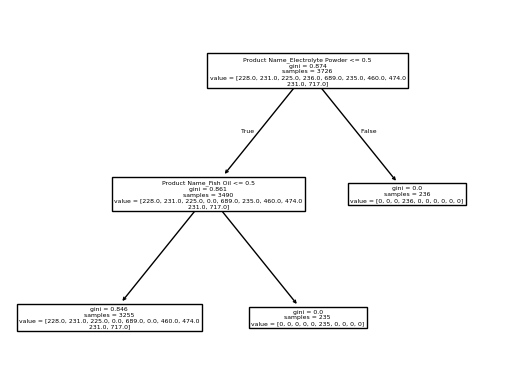

In [12]:
dectree = DecisionTreeClassifier(max_depth = 2)
dectree = dectree.fit(X_train, y_train)
tree.plot_tree(dectree, feature_names = X.columns)
plt.show()